#AEROFIT BUSINESS CASE STUDY

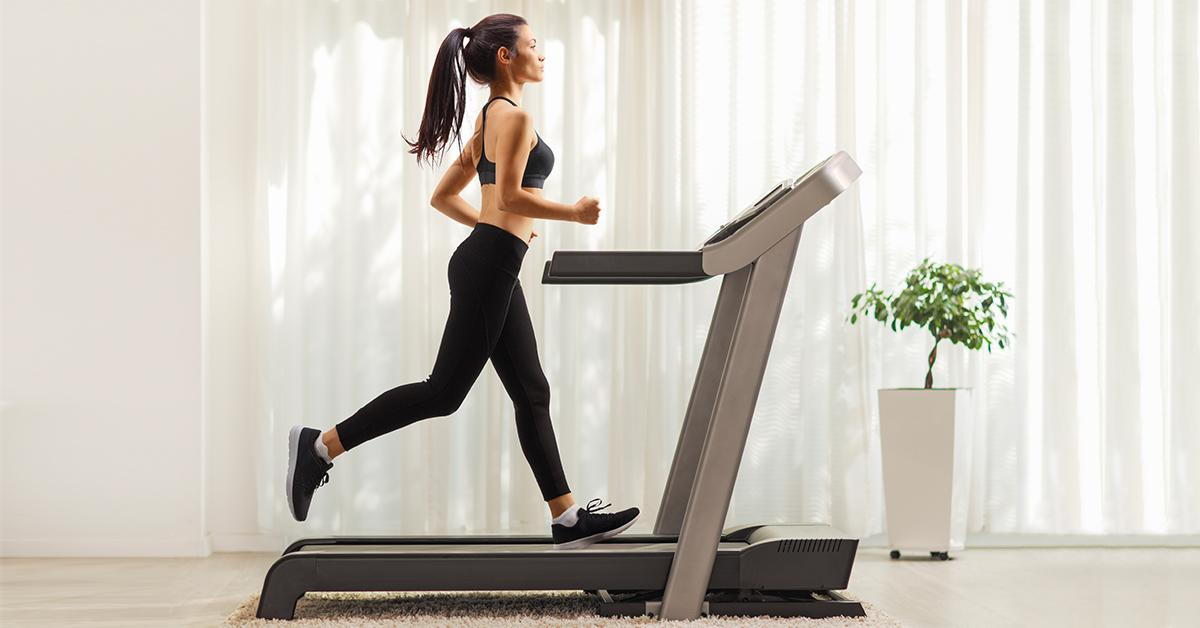

#**Business Problem Statement** :
To identify charcterstics of target audience for each type of treadmill offered by Aerofit company.



#**A high level overview of Aerofit Datset Descriptive Statistics and Probability.**
---
◼ **Loading & Inspecting the dataset**


*   Importing Libraries
*   First look at the dataset
*   Shape inspection
*   Column descriptions
*   Checking unique values of categorical columns
*   Stats overview

◼ **Missing Value Check**
* Checking for missing values
* Checking for duplicacy of data

◼ **EDA**

▪ Univariate analysis


*   Percentage of sold models
*   Percentage analysis of different Gender 
*   Percentage analysis of Marital Status
*   Univariate analysis of all numerical columns

◼ **Category creation**
*   Age group
*   Salary group

◼ **Correlation**
*   Correlation
*   Heatmap
*   Pairplot

◼ **Probabilities**
*  Crosstab for marginal & conditional probabilities
*  Probability Tree Diagram

◼ **Customer Profiling**
*  Segment A
*  Segment B
*  Segment C

◼ **Recap & Summary**

*   Actionable insights











**Importing the necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading and inspecting the dataset**

In [ ]:
df = pd.read_csv('/content/aerofit_treadmill.csv')

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


This how the head of our datset looks like

In [ ]:
df.shape

(180, 9)

We have 180 rows and 9 columns to derive insights from.

In [ ]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

The column descriptions are as follows 

**Product** :	KP281, KP481, or KP781

**Age**:	In years

**Gender**:	Male/Female

**Education**:	In years

**MaritalStatus**:	Single or partnered
 
**Usage**:	The average number of times the 
customer plans to use the treadmill each week.

**Income**:	Annual income (in $)

**Fitness**: Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

**Miles**:	The average number of miles the customer expects to walk/run each week

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


We have 6 numerical data types amd 3 categorical data types

**Checking unique values in categorical columns**

In [ ]:
for i in df.select_dtypes(exclude=["number"]).columns:
  print(f'{i} : {df[i].unique()}')

Product : ['KP281' 'KP481' 'KP781']
Gender : ['Male' 'Female']
MaritalStatus : ['Single' 'Partnered']


**The types of Treadmills offered by Aerofit ar**e:


*   KP281 : an entry-level treadmill that sells for $1,500

*   KP481 : for mid-level runners that sell for $1,750.

*   KP781 : a treadmill having advanced features that sell for $2,500.







In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


From the above tabular column, we can observe the following:

1.   The average age of the customers is around 28 & the lowest age is 18 while the highest is 50.
2.   The education years of a person ranges from 12 to 21 with 15.5 being the average.
3. Most people who buy treadmill deem themselves to be physically pretty fit with an average rating of 3.3/5 on the fitness scale.
4. The customers plan to use the tredmill for an average of 3.4 times a week and intend to run 103 miles/week on an average which is quite a stretch in my view.
5. Lastly the average income is 53719 and the median income is 50596 which transaltes to a 6% differnece between the mean and the median indicating that there aren't many outliers.


##**Missing data check**

In [ ]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

There are no missing values in our dataset which paves way to our analyis without any hiccups.

In [ ]:
df.duplicated().sum()

0

We do not have any duplicate values as well.

##**EDA**

**Univariate Analysis**

**Percentage of sold models**

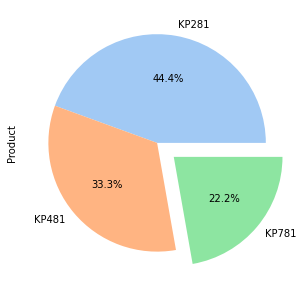

In [ ]:
df['Product'].value_counts().plot(kind='pie',figsize=(5,5),explode=[0,0,0.2],autopct='%1.1f%%')
plt.show()

The percentage of different products is as shown:

*   KP281 constitutes to the most sales out of the 3
*   KP481 comes next occupying 1/3rd of the market
*   KP781 makes up the remaining 22.2%



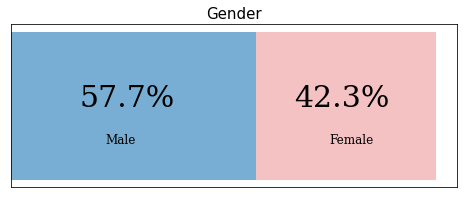

In [ ]:
fig_split = plt.figure(figsize=(8,3))
ax_split = fig_split.add_subplot(111)
ax_split.barh("Gender",df['Gender'].value_counts().T['Male'],color='#78AED3')
ax_split.barh("Gender",df['Gender'].value_counts().T['Female'],left=df['Gender'].value_counts().T['Male'],color='#F4C2C2')
ax_split.set_xticks([])
ax_split.set_yticks([])
ax_split.annotate("57.7%",xy=(29,0),fontsize=30,color='Black',fontfamily='serif')
ax_split.annotate("Male",xy=(40,-0.2),fontsize=12,color='Black',fontfamily='serif')
ax_split.annotate("42.3%",xy=(120,0),fontsize=30,color='Black',fontfamily='serif')
ax_split.annotate("Female",xy=(135,-0.2),fontsize=12,color='Black',fontfamily='serif')
ax_split.set_title("Gender",fontsize=15)
plt.show()

Male customers constitute to a larger share of the market compared to Female customers.

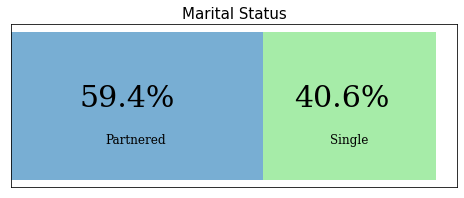

In [ ]:
fig_split = plt.figure(figsize=(8,3))
ax_split = fig_split.add_subplot(111)
ax_split.barh("Gender",df['MaritalStatus'].value_counts().T['Partnered'],color='#78AED3')
ax_split.barh("Gender",df['MaritalStatus'].value_counts().T['Single'],left=df['MaritalStatus'].value_counts().T['Partnered'],color='#A6ECA8')
ax_split.set_xticks([])
ax_split.set_yticks([])
ax_split.annotate("59.4%",xy=(29,0),fontsize=30,color='Black',fontfamily='serif')
ax_split.annotate("Partnered",xy=(40,-0.2),fontsize=12,color='Black',fontfamily='serif')
ax_split.annotate("40.6%",xy=(120,0),fontsize=30,color='Black',fontfamily='serif')
ax_split.annotate("Single",xy=(135,-0.2),fontsize=12,color='Black',fontfamily='serif')
ax_split.set_title("Marital Status",fontsize=15)
plt.show()

It is surprising to see Partnered/Married individuals workout more than singles.

**Writing a function to do univariate analysis of all numerical columns**

In [ ]:
def univariate_plot(x):
  fig = plt.figure(figsize=(15,5))
  ax2 = fig.add_subplot(121)
  sns.boxplot(x,ax=ax2,color='mediumseagreen')
  ax = fig.add_subplot(122)
  sns.histplot(x,kde=True,ax=ax,color='mediumseagreen')
  ax.axvline(x.mean(), color='orange', linestyle='-',linewidth=1.5)
  ax.axvline(x.median(), color='red', linestyle='-.',linewidth=1.5)
  ax.axvline(x.mode()[0], color='blue', linestyle='--',linewidth=1.5)
  ax.legend(labels=['kde','mean','median','mode'])
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


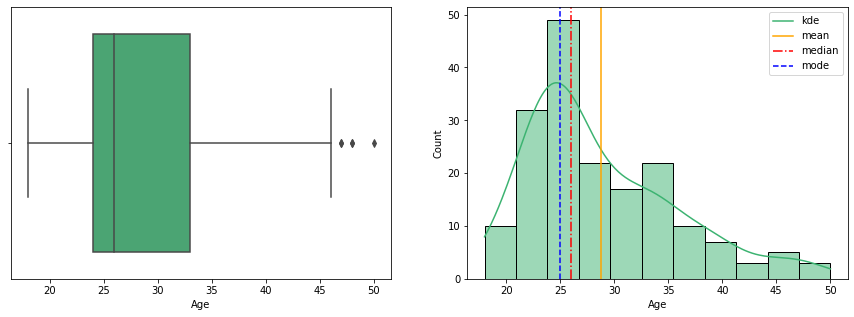

None


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


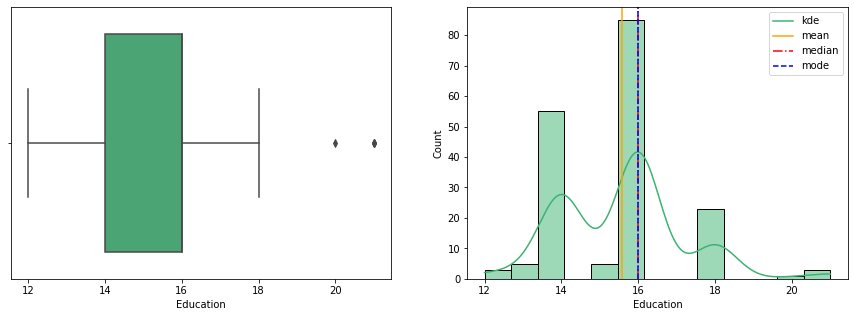

None


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


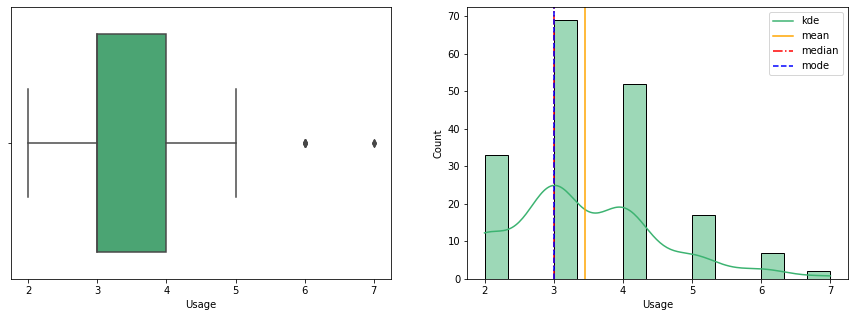

None


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


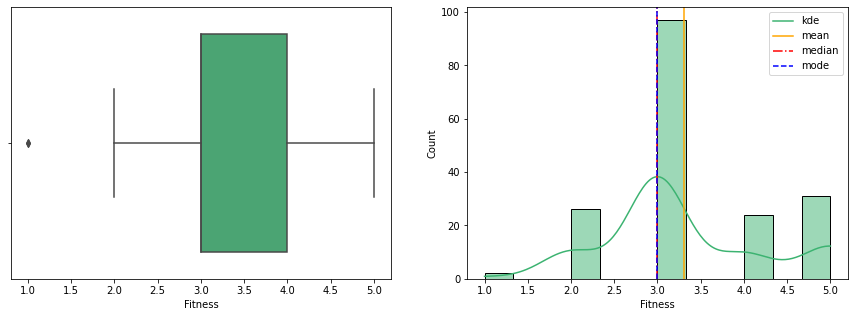

None


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


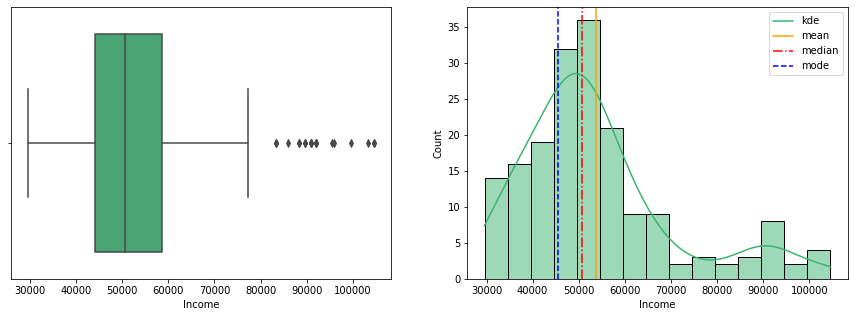

None


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


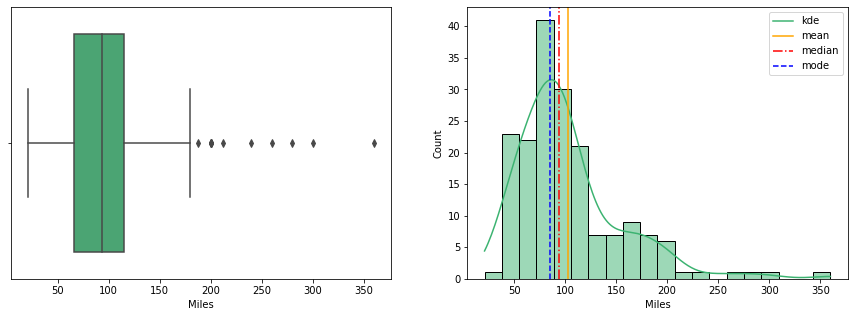

None


In [ ]:
for i in df.select_dtypes(include=["number"]).columns:
  print(univariate_plot(df[i]))

***Observations***

**Age**:


*   The average age of customers is 29 years and most purchases were made from customers who are 25 years old.
*   Most of the customers range from 18 to 45 with a few outliers towards the right.

**Education**:


*   The majority of customers have anywhere between 14 to 16 years of education 
*   There are no customers with education background of less than 12 years.

**Usage**:


*   Most Customers plan to use the machine for 3 or 4 times a week
*   There are just a couple of outliers towards the right

**Fitness**:


*   The median fitness score is 3 
*   The majority of them have a fitness score of either 3 or 4.

**Income**:


*   Income data is skewed towards the right and this is not surprising since, Universally there always exits people who earn much more than the majority of people.
*   The average income of the customer is around 55,000 dollars and the median income is 50,000 dollars.

**Miles**:



*   An average customers intends to run 100 miles per week.
*   It is also surprising to see that a few customers intend to run more than 200 miles per week.














I have decided not to remove the outliers since removing outliers results in a huge reduction of datset. 

Also another reason for not removing outliers was because any income above 60k dollars seemed to fall in the same category and did not show any deviance in behaviour.

**Creation of category**

Age group

In [ ]:
df['Age_group'] = pd.cut(df['Age'],[0,19,35,55],labels=['teen','young adult','middle age'])

We have created 3 age groups :


*   Teenage : < 18 years
*   Young adult : 18-35 years
*   Middle age:35-55 years

This has been split according to the universal norms of age classification



Salary group

In [ ]:
df['Salary_group'] = pd.cut(df['Income'],[0,45000,60000,110000],labels=['Low','Medium','High'])

The salary has been categorised into 3 categories:


*   Low : < 45000/year
*   Medium : 45000 - 60000/year

* High : > 60000$/year



**Correlation Heatmap & Pairplot**

In [ ]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


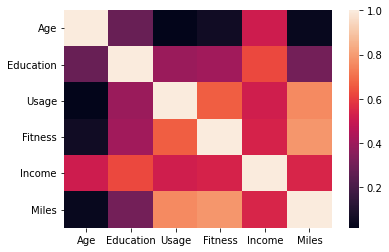

In [ ]:
sns.heatmap(df.corr())

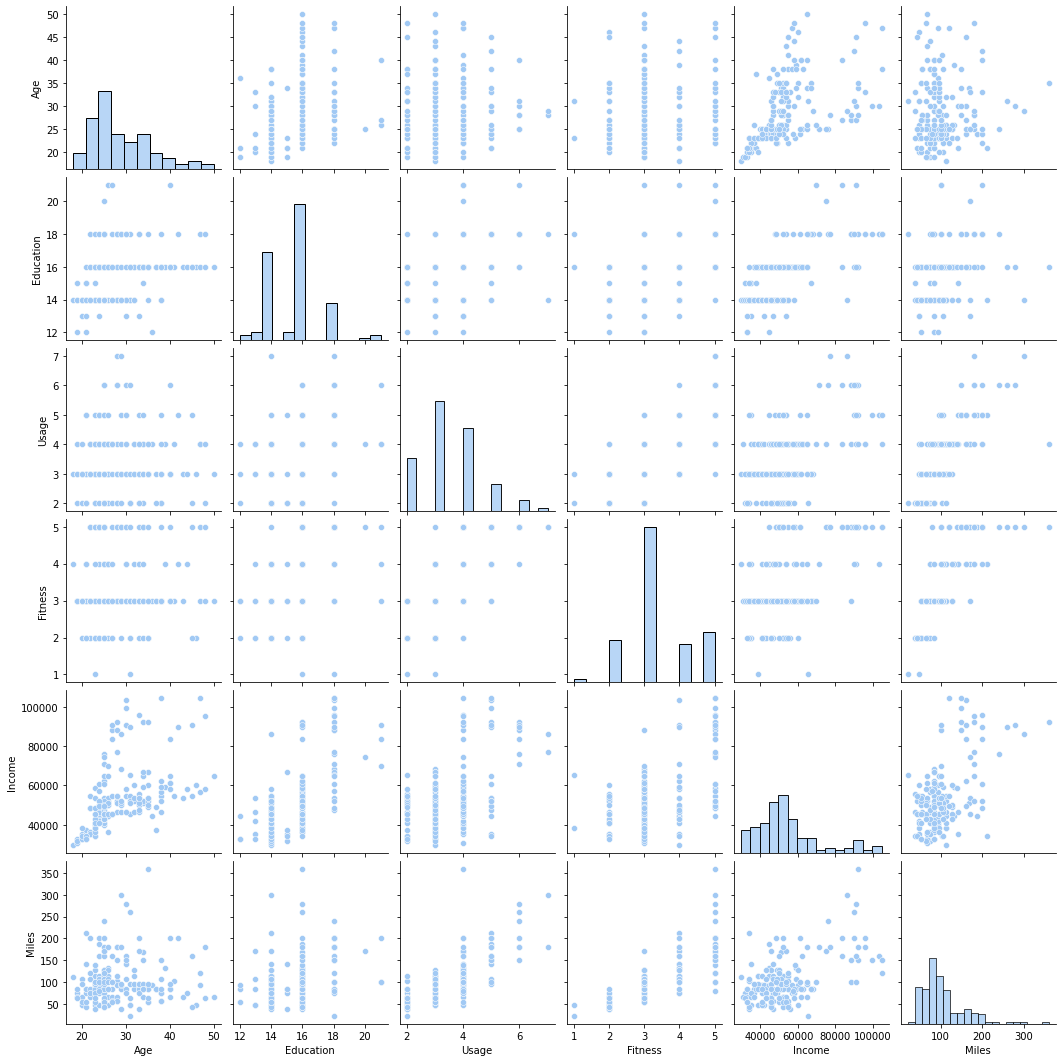

In [ ]:
sns.pairplot(df)

**Observations:**


*   Usage and Miles are highly correlated, This is a no brainer since more miles are obviously covered with more usage.
*   Education and Income are positively correlated, that is to say the higher the number of years of education, the greater is the income.



##**Probabilities**

In [ ]:
pd.crosstab(df['Salary_group'],df['Product'],margins=True).apply(lambda r: round(r/len(df),3), axis=1)*100

Product,KP281,KP481,KP781,All
Salary_group,,,,
Low,18.9,8.3,0.0,27.2
Medium,22.2,21.1,6.1,49.4
High,3.3,3.9,16.1,23.3
All,44.4,33.3,22.2,100.0


From the above data we can make the following observations:


The probability that a customer buys


*   KP281 : 44.4%
*   KP481 : 33.3%
*   KP781 : 22.2%

The probability that a customer earns


*   Low Salary : 27.2%
*   Medium Salary : 49.4%
* High Salary : 23.3%




In [ ]:
round(df.groupby(['Salary_group','Gender','Product']).count()['Age'].unstack()/len(df)*100,3)

Product               KP281   KP481   KP781
Salary_group Gender                        
Low          Female   9.444   3.889   0.000
             Male     9.444   4.444   0.000
Medium       Female  10.556  10.000   1.111
             Male    11.667  11.111   5.000
High         Female   2.222   2.222   2.778
             Male     1.111   1.667  13.333

**Observations:** 
*   Low salary bracket people do not buy KP781
*   Medium salary people are equally likely to buy KP281 or KP481

**Insights/Recommendations**:
* Aerofit should never try to target low salary bracket people to sell KP781 since it will never lead to a conversion and it will end up driving the overall customer acquisition cost.



In [ ]:
df.groupby("Salary_group").count()['Product']/df.groupby("Salary_group").count()['Product'].sum()*100

Salary_group
Low       27.222222
Medium    49.444444
High      23.333333
Name: Product, dtype: float64

In [ ]:
df[df['Salary_group'] == 'Medium'].groupby("Gender").count()['Age']/df[df['Salary_group'] == 'Medium'].groupby("Gender").count()['Age'].sum()*100

Gender
Female    43.820225
Male      56.179775
Name: Age, dtype: float64

In [ ]:
df[((df['Salary_group'] == 'Medium')) & (df['Gender'] == 'Female')].groupby('Product').count()['Age']/df[((df['Salary_group'] == 'Medium')) & (df['Gender'] == 'Female')].groupby('Product').count()['Age'].sum()*100

Product
KP281    48.717949
KP481    46.153846
KP781     5.128205
Name: Age, dtype: float64

In [ ]:
df[((df['Salary_group'] == 'Medium')) & (df['Gender'] == 'Male')].groupby('Product').count()['Age']/df[((df['Salary_group'] == 'Medium')) & (df['Gender'] == 'Male')].groupby('Product').count()['Age'].sum()*100

Product
KP281    42.0
KP481    40.0
KP781    18.0
Name: Age, dtype: float64

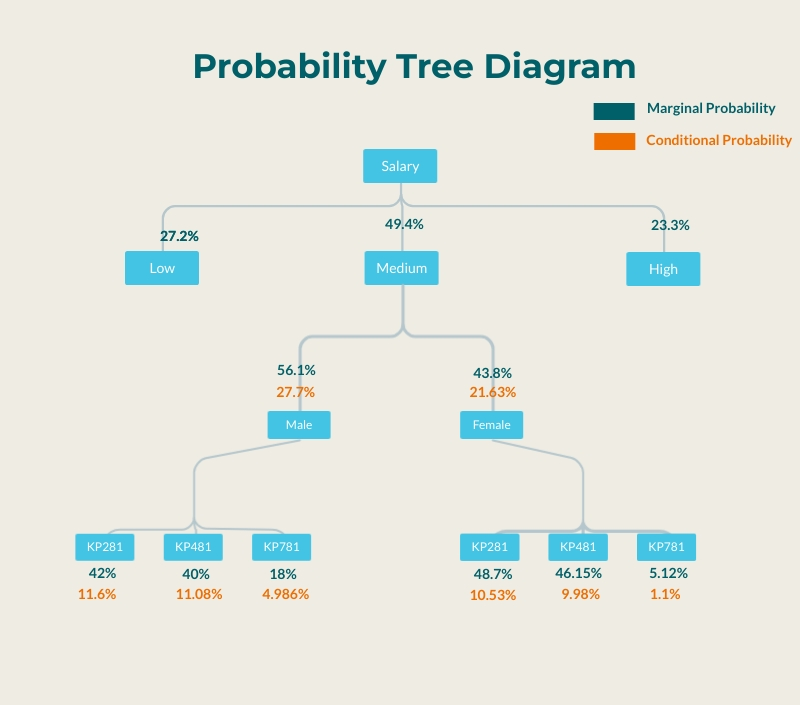

The above tree diagram helps us make the following observations:


*   The probability that a female buys a KP781 from a medium salary bracket is as low as 1.1%

*   The probability that a male buys a KP781 from a medium salary bracket on the other hand is 4.9%

* The difference in probablities of a male and a female buying KP281 or KP481 is almost the same.

**Inference** : Males despite being in the same salary bracket as females tend to spend more money 

**Conclusion**: A male person is more likely to buy KP781 than a female person.

**Insights** : Since the probability of a person buying a KP781 model from a medium salary bracket is low, the cost of customer acquisition for KP781 will definitely be high. Given that a male person is more likely to buy KP781 than a female, while targetting ads to acquire customers for KP781 on social media, preference can be given to male customers over female customer demographic to essentially reduce cost of acquisition.



In [ ]:
round(df.groupby(['Age_group','Gender','Product']).count()['Age'].unstack()/len(df)*100,2)

Product             KP281  KP481  KP781
Age_group   Gender                     
teen        Female   0.56   0.00   0.00
            Male     1.67   0.56   0.00
young adult Female  18.89  13.89   3.89
            Male    15.56  14.44  15.00
middle age  Female   2.78   2.22   0.00
            Male     5.00   2.22   3.33

**Observations**:


*  The probability that a teenager buys a treadmill is very slim.
*   The largest demographic for treadmills are young adults who are of the age group 20 to 35.
* Female young adults are more likely to buy a basic treadmill than the high end ones.
* When it comes to middle age, middle aged men are more likely to buy treadmill than middle aged women. 



In [ ]:
round(df.groupby(['Salary_group','Gender','MaritalStatus']).count()['Age'].unstack()/len(df)*100,2)

MaritalStatus        Partnered  Single
Salary_group Gender                   
Low          Female       7.78    5.56
             Male         6.11    7.78
Medium       Female      12.22    9.44
             Male        16.67   11.11
High         Female       5.56    1.67
             Male        11.11    5.00

**Observations**:


*   In low salried bracket, partnered females tend to buy more treadmill than partnered males.
On the other hand, single males on low salaried bracket have a better likelyhood of buying a treadmill than their single counterparts.
*   In medium and high salary bracket, men are more likely to buy a treadmill than women across both partnered and single category.



##**Customer Profiling**

**Age and Income distribution**

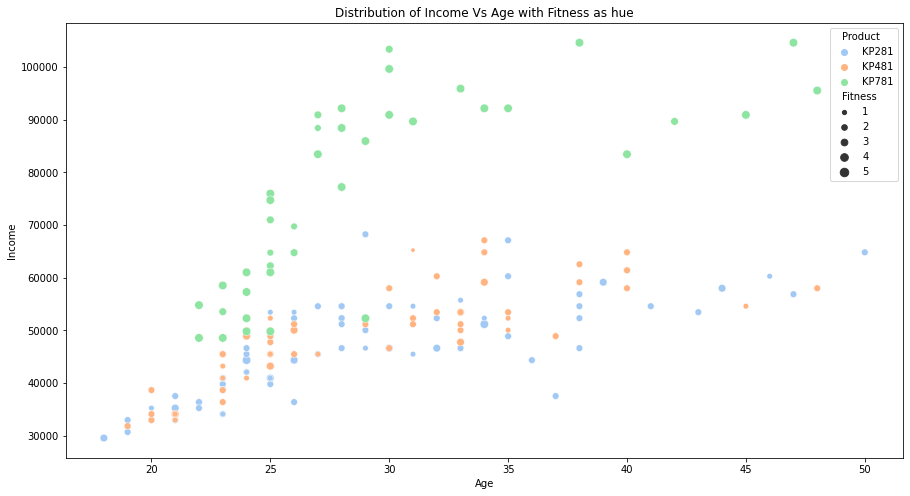

In [ ]:
plt.figure(figsize = (15,8))
plt.title("Distribution of Income Vs Age with Fitness as hue")
sns.set_palette("pastel")
sns.scatterplot(x=df['Age'],y=df['Income'],hue= df['Product'],size=df['Fitness'])
sns.color_palette("vlag", as_cmap=True)
plt.show()


**Inference**

From the plot we can see that most of the people who earn more than 48000$ and with a self rated fitness level of 4 or 5 tend to buy **KP781**



In [ ]:
df[(df['Age'] > 20) &  (df['Income'] > 48000) &  (df['Fitness'] > 3)]['Product'].value_counts()

KP781    36
KP481     4
KP281     3
Name: Product, dtype: int64

In [ ]:
round(df[(df['Age'] > 20) &  (df['Income'] > 48000) &  (df['Fitness'] > 3)].groupby(['Product','Gender']).count()['Age'].unstack()/len(df[(df['Age'] > 20) &  (df['Income'] > 48000) &  (df['Fitness'] > 3)])*100,2)

Gender,Female,Male
Product,,
KP281,2.33,4.65
KP481,2.33,6.98
KP781,13.95,69.77


Let's create a profile to encapsule customers who's income is greater than 48000$ and also with fitness level greater than 3. Let us denote these segment of people as **"A"**

The probability that people from segment A to buy 


*   **KP781** is 83.7%
*   **KP481** is 9.3%
*   **KP281** IS 6.9%








The general characterstics of customers who belong to segment A are as shown below

In [ ]:
df[(df['Age'] > 20) &  (df['Income'] > 48000) &  (df['Fitness'] > 3)].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,43.0,30.186047,7.208645,22.0,25.0,28.0,34.0,48.0
Education,43.0,16.953488,1.632315,13.0,16.0,16.0,18.0,21.0
Usage,43.0,4.651163,1.020824,3.0,4.0,4.0,5.0,7.0
Fitness,43.0,4.697674,0.464701,4.0,4.0,5.0,5.0,5.0
Income,43.0,72695.465116,19061.890553,48556.0,54158.5,70966.0,90886.0,104581.0
Miles,43.0,165.906977,58.801447,75.0,123.5,160.0,190.0,360.0


**Observations of customers from segment A**:


*   The mean salary is around 72.5k dollars while the median salary is about 71k dollars
*   An average customer of segment A works out for about 4.6 times per week running around 165 miles.
* The average number of education in years is about 17 years.



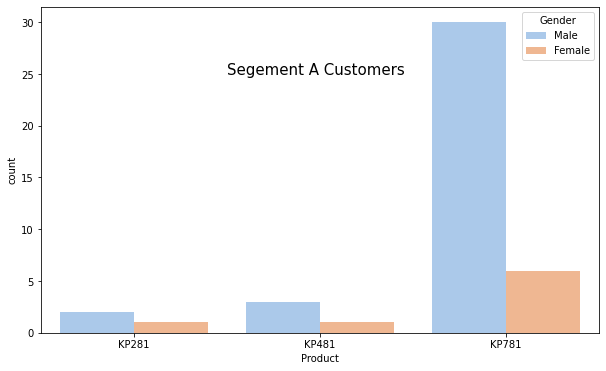

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Product',hue ='Gender', data = df[(df['Age'] > 20) &  (df['Income'] > 48000) &  (df['Fitness'] > 3)] )
plt.annotate("Segement A Customers",xy=(0.5,25),size=15)
plt.show()

**Observations**
* The above figure depicts the fact that KP781 is the highest sold model among customers from segment A
* Men are predominantly the larger demographic in this segment of customers.

**Usage and income distribution**


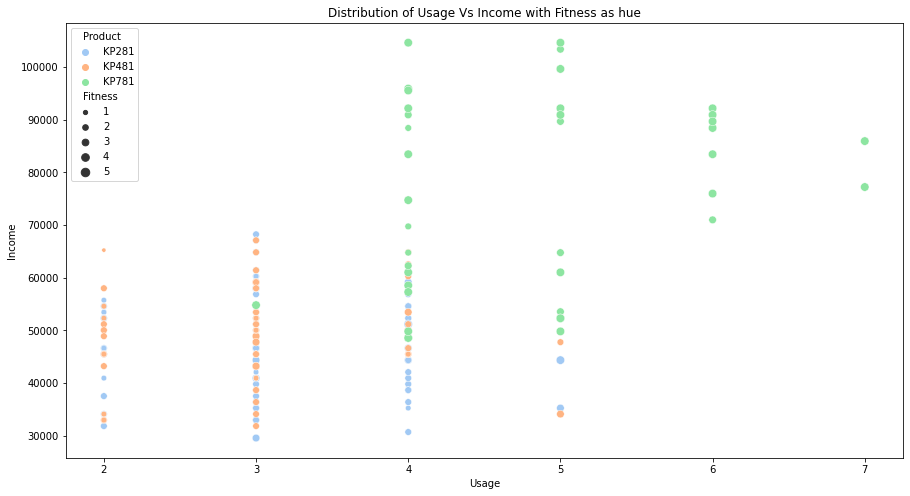

In [ ]:
import seaborn as sns
plt.figure(figsize = (15,8))
plt.title("Distribution of Usage Vs Income with Fitness as hue")
sns.set_palette("pastel")
sns.scatterplot(x=df['Usage'],y=df['Income'],hue= df['Product'],size=df['Fitness'])
sns.color_palette("vlag", as_cmap=True)
plt.show()

**Infernces from the plot**:


*   People who tend to use the treadmill more than 3 times a day and whose income is upwards of $58,000 more often than not tend to buy KP781.
*   The inverse of this is a good classification of people who do not buy KP781 but rather buy KP481 or KP281.



In [ ]:
df_B = df[(df['Usage']>3) & (df['Income']>58000)]['Product'].value_counts().reset_index()

In [ ]:
df_B['Product'] = df_B['Product'].apply(lambda x : float(x))

In [ ]:
df_B['Probability'] = df_B['Product']/df_B['Product'].sum()*100

In [ ]:
df_B

,index,Product,Probability
0,KP781,30.0,88.235294
1,KP481,3.0,8.823529
2,KP281,1.0,2.941176


In [ ]:
round(df[(df['Usage']>3) & (df['Income']>58000)].groupby(['Product','Gender']).count()['Age'].unstack().fillna(0)/len( df[(df['Usage']>3) & (df['Income']>58000)])*100,2)

Gender,Female,Male
Product,,
KP281,0.00,2.94
KP481,5.88,2.94
KP781,14.71,73.53


We have created another segment of customers called **"B"** those who tend to use the treadmill more than 3 times a day and whose income is upwards of $58,000.

The probability that these customers buy KP781,KP481 & KP281 are as shown in the above matrix.

The general characterstics of customers who belong to segment B are as shown below.

In [ ]:
 df[(df['Usage']>3) & (df['Income']>58000)].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,34.0,31.441176,6.959585,23.0,26.00,29.5,34.75,48.0
Education,34.0,17.382353,1.651715,14.0,16.00,18.0,18.00,21.0
Usage,34.0,4.823529,0.968303,4.0,4.00,4.5,5.75,7.0
Fitness,34.0,4.441176,0.785905,3.0,4.00,5.0,5.00,5.0
Income,34.0,80848.558824,14925.854902,58516.0,64758.00,84661.0,91819.75,104581.0
Miles,34.0,169.088235,62.332135,85.0,128.25,160.0,195.00,360.0


**Observations**:


*   Both the average and the median income of customers who belong to segment B have a higher income compared to segment A.
*   The median miles of both segment A & segment B customers are the same.



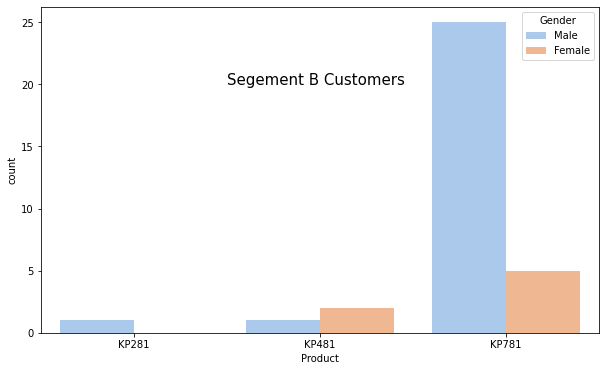

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Product',hue ='Gender', data =  df[(df['Usage']>3) & (df['Income']>58000)] )
plt.annotate("Segement B Customers",xy=(0.5,20),size=15)
plt.show()

**Observations**


*   Segment B customers are similar to Segment A customers.
*   The probability that a customer from segment B is more likely to buy KP781 model compared to customer from segment A by a slight margin.



**Segment C customers**

In [ ]:
round(df[(df['Usage']<=3) & (df['Income']<=58000)].groupby(['Product','Gender']).count()['Age'].unstack().fillna(0)/len(df[(df['Usage']<=3) & (df['Income']<58000)])*100,2)

Gender,Female,Male
Product,,
KP281,31.11,24.44
KP481,21.11,22.22
KP781,0.00,1.11


In [ ]:
df[(df['Usage']<=3) & (df['Income']<=58000)].groupby('Product')['Age'].count()/len(df[(df['Usage']<=3) & (df['Income']<=58000)])*100

Product
KP281    55.555556
KP481    43.333333
KP781     1.111111
Name: Age, dtype: float64

We can categorise the customers who plans to use treadmill less than 4 times a week and those whose income is less than or equal to 58000 dollars as **segment C**.




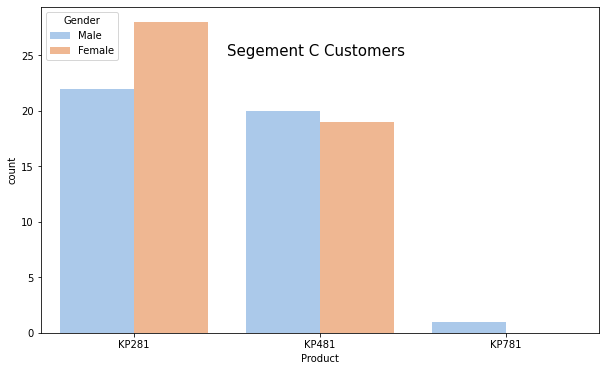

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Product',hue ='Gender', data =  df[(df['Usage']<=3) & (df['Income']<=58000)] )
plt.annotate("Segement C Customers",xy=(0.5,25),size=15)
plt.show()

**Observationsof Segment C customers**:



*   98.8% of the customers buy either KP281 or KP481
*   Female customers of segment C are more likely to buy KP281
* Male customers are more likely to buy KP481 when compared to their female counterparts.
* There are no female customers from this segment who buy KP781

##**Recap & Summary**


*   **Low salary bracket people do not buy KP781**


> Aerofit should never try to target low salary bracket people to sell KP781 since it will never lead to a conversion and it will end up driving the overall customer acquisition cost.

* **Males despite being in the same salary bracket as females tend to spend more money**


> Given that a male person is more likely to buy KP781 than a female, While targetting ads to acquire customers for KP781 on social media, preference can be given to male customers over female customer demographic to essentially reduce cost of acquisition.

* **The largest demographic for treadmills are young adults who are of the age group 20 to 35.**


> Social media promotions should mainly target this demographic to have an effective customer acquisition cost.

* **Female young adults are more likely to buy a basic treadmill than the high end ones.**


> Entry level treadmill which is KP281 should be promoted for female young adults who are not that keen on fitness & have a fitness score less than 4.

* **In low salaried bracket, partnered females tend to buy more treadmill than partnered males. On the other hand, single males on low salaried bracket have a better likelyhood of buying a treadmill than their single counterparts.**


> Aerofit should deem their promotional campaigns accordingly, paying attention to partnered females and single males.

* **Customers from segment A & segment B have high probablities of 83.7% & 88.2% respectively of buying KP781 treadmills.**


> Whenever Aerofit comes across either of the customer segments, they should try and sell KP781 since the conversion rate is the highest.

* **Male customers from segment C are more likely to buy KP481 compared to female customers**


> Aerofit should try and push the KP481 model to male customers from segment C






